## Weerdata weergeven

Dit Notebook is een voorbeeld van een eenvoudige data-toepassing. We halen weergegevens op van het KNMI, geven deze weer in een grafiek, en laten er eenvoudige statistiek op los.

## Ophalen van KNMI-data

Het KNMI heeft veel gegevens beschikbaar als "open data": dat wil zeggen dat deze data voor iedereen (gratis) te gebruiken zijn. Deze gegevens kun je niet alleen op hun website bekijken, maar ook via een API ophalen. In dit geval is dat een URL die je op een bepaalde manier aanspreekt. Je krijgt dan als resultaat geen HTML-bestand, maar een CSV-bestand: een tabel in tekstvorm waarbij de waarden door komma's gescheiden worden.

De beschrijving van de API vind je op de volgende pagina's:

* https://www.knmi.nl/kennis-en-datacentrum/achtergrond/data-ophalen-vanuit-een-script

### Python HTTP-requests

In Python kun je een HTTP-request (verzoek) sturen naar een webserver, met behulp van de functies van de module `requests`. In dit geval hebben we een POST-request nodig. De gegevens (parameters) voor het verzoek kunnen we opgeven in de vorm van een Python dictionary; dit wordt omgezet in het juiste formaat voor het HTTP-protocol.

> De beschrijving van deze module vind je op: https://2.python-requests.org/en/master/. Een korte uitleg voor de eerste stappen: https://2.python-requests.org/en/master/user/quickstart/#make-a-request

Met de onderstaande opdracht halen we de gemiddelde, minimum en maximum temperaturen van de dagen in november 2019 op:

In [1]:
import requests

url = 'http://projects.knmi.nl/klimatologie/daggegevens/getdata_dag.cgi'
myobj = {'stns': 260, 'start': '20191101', 'end': '20191130', 'vars': 'TEMP'}

x = requests.post(url, data = myobj)

print(x.text)

# BRON: KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI)
# Opmerking: door stationsverplaatsingen en veranderingen in waarneemmethodieken zijn deze tijdreeksen van dagwaarden mogelijk inhomogeen! Dat betekent dat deze reeks van gemeten waarden niet geschikt is voor trendanalyse. Voor studies naar klimaatverandering verwijzen we naar de gehomogeniseerde reeks maandtemperaturen van De Bilt <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/gehomogeniseerde-reeks-maandtemperaturen-de-bilt> of de Centraal Nederland Temperatuur <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt>.
# 
# 
# STN      LON(east)   LAT(north)     ALT(m)  NAME
# 260:         5.180       52.100       1.90  DE BILT
# 
# YYYYMMDD = Date (YYYY=year MM=month DD=day); 
# TG       = Daily mean temperature in (0.1 degrees Celsius); 
# TN       = Minimum temperature (in 0.1 degrees Celsius); 
# TNH      = Hourly division in which TN was measured; 
# TX       = Maximum temperatur

Merk op dat we de temperaturen in eenheden van 0,1'Celcius krijgen, als gehele getallen. Voorlopig houden we dit zo: dat rekent soms wat gemakkelijker.

## Van CSV-tekstdata naar getallen

Deze data moeten we nu eerst omzetten in een formaat dat we kunnen gebruiken om te rekenen. We kunnen hiervoor eventueel een speciale module gebruiken, maar het is niet zo lastig om de omzetting zelf te schrijven. 

> Voor grote bestanden is het gebruik van de voorgedefinieerde functies efficiënter; we gebruiken hier maar een klein bestand.

> We gebruiken voor elk soort temperatuur een afzonderlijk array. In numpy/pandas kunnen we dat fraaier oplossen,  dat komt later aan bod.

In [2]:
def read_temperatures (txt):
    temps = []
    max_temps = []
    min_temps = []
    for line in txt.splitlines():
        if line[0] != '#':                  # skip comment lines
            elems = line.split(',')         # comma separated values
            temps.append(int(elems[2]))     # average temp
            max_temps.append(int(elems[5])) # max temp
            min_temps.append(int(elems[3])) # min temp
    return {'temps': temps, 'min_temps': min_temps, 'max_temps': max_temps}

In [3]:
all_temps = read_temperatures(x.text)
print(all_temps)

{'temps': [76, 132, 105, 103, 92, 84, 78, 49, 68, 24, 52, 52, 60, 57, 43, 39, 47, 66, 46, 15, 30, 67, 60, 48, 72, 96, 104, 93, 43, 9], 'min_temps': [-7, 107, 85, 89, 77, 67, 54, 18, 19, -13, -1, 41, 41, 35, 22, 6, 7, 43, -11, -25, 10, 32, 40, 7, 56, 71, 96, 71, -11, -28], 'max_temps': [134, 147, 125, 125, 109, 114, 96, 97, 107, 94, 79, 73, 80, 78, 56, 62, 81, 83, 77, 66, 55, 107, 82, 99, 106, 115, 119, 107, 88, 92]}


## Grafiek

Deze temperaturen geven we vervolgens weer in een grafiek. 
Hiervoor zetten we de invoerwaarden eerst om in numpy-arrays.

In [4]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [5]:
x = numpy.arange(1, len(all_temps['temps'])+1)
temps = numpy.asarray(all_temps['temps'])
max_temps = numpy.asarray(all_temps['max_temps'])
min_temps = numpy.asarray(all_temps['min_temps'])

De grafiek bestaat uit 3 deel-plots, voor minimum, maximum en gemiddelde temperaturen.
Voor elke deel-plot gebruiken we dezelde x-waarden: de dagnummers van 1-30.

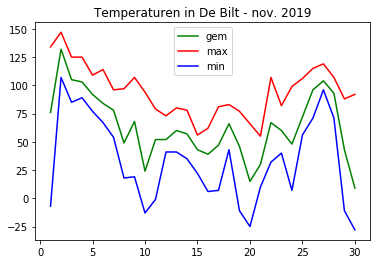

In [6]:
pyplot.title("Temperaturen in De Bilt - nov. 2019")
tgem, = pyplot.plot(x, temps, 'g')
tmax, = pyplot.plot(x, max_temps, 'r')
tmin, = pyplot.plot(x, min_temps, 'b')
pyplot.legend([tgem, tmax, tmin], ['gem', 'max', 'min'])

We kunnen de deelplots ook in één enkele aanroep van `pyplot.plot` combineren, zie hieronder.

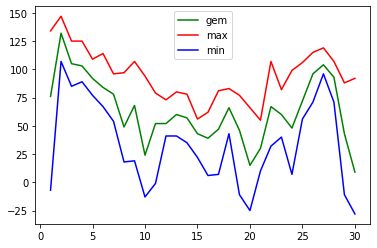

In [7]:
lines  = pyplot.plot(x, temps, 'g', x, max_temps, 'r', x, min_temps, 'b')
pyplot.legend(lines, ['gem', 'max', 'min'])

## Opdrachten

Met "dagtemperatuur" bedoelen we hieronder de gemiddelde temperatuur van een dag.

1. bepaal de gemiddelde dagtemperatuur van november
2. bepaal de mediaan dagtemperatuur van november
3. bepaal de maximum dagtemperatuur van november
4. bepaal de minimum dagtemperatuur van november

## Opdrachten

1. haal de temperaturen van een andere maand van het knmi, en teken deze in een grafiek
2. bepaal de gemiddelde, mediaan, maximum en minimum van deze maand
3. heeft het zin om het temperatuurverloop van oktober te vergelijken met dat van november? (Kun je deze eenvoudig in eenzelfde grafiek plaatsen?)
4. heeft het zin om het temperatuurverloop van november te vergelijken met dat van een jaar eerder?

## Opmerkingen

* twee maanden met eenzelfde gemiddelde temperatuur kunnen een heel verschillend temperatuur-karakter hebben. Waarin kunnen deze verschillen, en hoe zou je dat kunnen beschrijven in een getal?
* 

## Gevorderde opdrachten

* bepaal de gemiddelde temperatuur van de maand januari van de afgelopen eeuw in De Bilt, en geef die weer in een grafiek.
